In [4]:
from cmdstanpy import CmdStanModel
import pandas as pd
import arviz as az 
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

## Excercise 1 -  Generated Quantities Block

In [5]:
gen_quant = CmdStanModel(stan_file='code_1.stan')


INFO:cmdstanpy:found newer exe file, not recompiling


In [6]:
samples = gen_quant.sample(data={'M':6}, 
                            fixed_param=True, 
                            iter_sampling=1000, 
                            iter_warmup=0, 
                            chains = 1)

INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [7]:
df= samples.draws_pd()

y_sim1=df['y_sim[1]']
y_sim2=df['y_sim[2]']
y_sim3=df['y_sim[3]']
y_sim4=df['y_sim[4]']
y_sim5=df['y_sim[5]']
y_sim6=df['y_sim[6]']
lambdas=df['lambda']
df

,lp__,accept_stat__,lambda,y_sim[1],y_sim[2],y_sim[3],y_sim[4],y_sim[5],y_sim[6]
0,0.0,0.0,66.3109,78.0,69.0,52.0,64.0,80.0,80.0
1,0.0,0.0,172.7770,163.0,142.0,161.0,177.0,180.0,183.0
2,0.0,0.0,209.7950,201.0,211.0,215.0,224.0,219.0,200.0
3,0.0,0.0,113.5630,126.0,122.0,93.0,104.0,131.0,109.0
4,0.0,0.0,25.9043,23.0,22.0,35.0,25.0,22.0,37.0
...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,166.1290,165.0,149.0,162.0,151.0,175.0,146.0
996,0.0,0.0,10.8500,9.0,9.0,13.0,13.0,7.0,11.0
997,0.0,0.0,55.4453,53.0,54.0,63.0,67.0,57.0,69.0
998,0.0,0.0,157.9930,182.0,147.0,149.0,155.0,167.0,164.0


<BarContainer object of 500 artists>

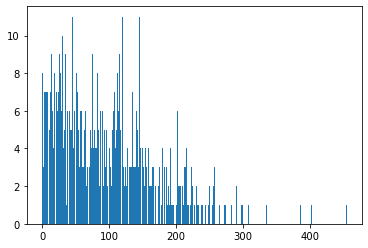

In [8]:
plt.hist(y_sim1,bins=500)[2]

<BarContainer object of 500 artists>

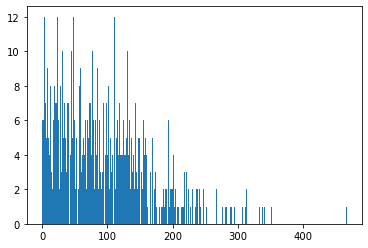

In [9]:
plt.hist(y_sim2,bins=500)[2]

<BarContainer object of 500 artists>

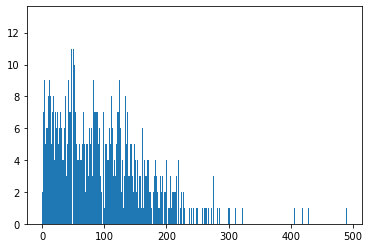

In [10]:
plt.hist(y_sim3,bins=500)[2]

<BarContainer object of 500 artists>

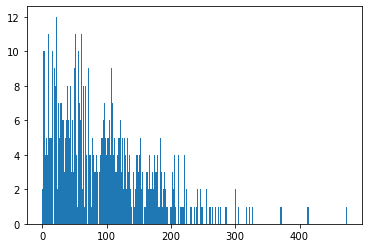

In [11]:
plt.hist(y_sim4,bins=500)[2]

<BarContainer object of 500 artists>

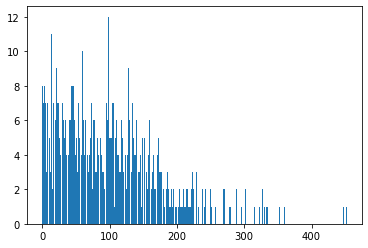

In [12]:
plt.hist(y_sim5,bins=500)[2]

<BarContainer object of 500 artists>

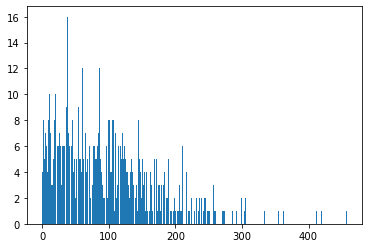

In [13]:
plt.hist(y_sim6,bins=500)[2]

<BarContainer object of 500 artists>

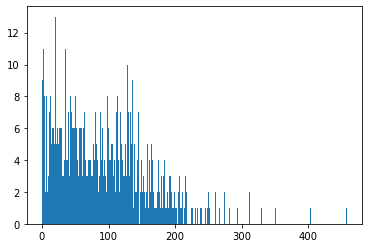

In [14]:
plt.hist(lambdas,bins=500)[2]

## Excercise 2 - Constraints on the data 

In [15]:
bern1 = CmdStanModel(stan_file='code_2.stan')
samp_bern1 = bern1.sample(data={'N':2, 'y':[0,2]}) 


INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)
	Exception: bernoulli_lpmf: n[2] is 2, but must be in the interval [0, 1] (in 'C:/Users/Emperor/code_2.stan', line 12, column 3 to column 24)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['C:\\Users\\Emperor\\code_2.exe', 'id=1', 'random', 'seed=52674', 'data', 'file=C:\\Users\\Emperor\\AppData\\Local\\Temp\\tmp3o55nlg3\\v8vnutis.json', 'output', 'file=C:\\Users\\Emperor\\AppData\\Local\\Temp\\tmp3o55nlg3\\code_2-20220309211412_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	C:\Users\Emperor\AppData\Local\Temp\tmp3o55nlg3\code_2-20220309211412_1.csv
 console_msgs (if any):
	C:\Users\Emperor\AppData\Local\Temp\tmp3o55nlg3\code_2-20220309211412_0-stdout.txt

In [16]:
bern2 = CmdStanModel(stan_file='code_3.stan')
samp_bern2 = bern2.sample(data={'N':2, 'y':[0,2]}) 

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

ERROR:cmdstanpy:Chain [1] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [2] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [3] error: error during processing Operation not permitted
ERROR:cmdstanpy:Chain [4] error: error during processing Operation not permitted


INFO:cmdstanpy:CmdStan done processing.


RuntimeError: Error during sampling:
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in 'C:/Users/Emperor/code_3.stan', line 3, column 2 to column 29)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in 'C:/Users/Emperor/code_3.stan', line 3, column 2 to column 29)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in 'C:/Users/Emperor/code_3.stan', line 3, column 2 to column 29)
Exception: code_3_model_namespace::code_3_model: y[2] is 2, but must be less than or equal to 1.000000 (in 'C:/Users/Emperor/code_3.stan', line 3, column 2 to column 29)Command and output files:
RunSet: chains=4, chain_ids=[1, 2, 3, 4], num_processes=4
 cmd (chain 1):
	['C:\\Users\\Emperor\\code_3.exe', 'id=1', 'random', 'seed=74665', 'data', 'file=C:\\Users\\Emperor\\AppData\\Local\\Temp\\tmp3o55nlg3\\s8c6yrle.json', 'output', 'file=C:\\Users\\Emperor\\AppData\\Local\\Temp\\tmp3o55nlg3\\code_3-20220309211447_1.csv', 'method=sample', 'algorithm=hmc', 'adapt', 'engaged=1']
 retcodes=[1, 1, 1, 1]
 per-chain output files (showing chain 1 only):
 csv_file:
	C:\Users\Emperor\AppData\Local\Temp\tmp3o55nlg3\code_3-20220309211447_1.csv
 console_msgs (if any):
	C:\Users\Emperor\AppData\Local\Temp\tmp3o55nlg3\code_3-20220309211447_0-stdout.txt

In [ ]:
df21=samp_bern1.draws_pd()
df22=samp_bern2.draws_pd()
plt.plot(df21["theta"])

In [ ]:
plt.plot(df22["theta"])

## Excercise 3 - Constraints on parameters

### Unconstrained parameters

In [ ]:
model_gm1 = CmdStanModel(stan_file='code_4.stan')
out_gamma1 = model_gm1.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma1.diagnose()


In [ ]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()


### Constrained parameter

In [17]:
model_gm2 = CmdStanModel(stan_file='code_5.stan')
out_gamma2 = model_gm2.sample(output_dir='samples',iter_sampling=6000,iter_warmup=1000, seed=4838282)
out_gamma2.diagnose()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


"Processing csv files: C:\\Users\\Emperor\\samples\\code_5-20220309211448_1.csv, C:\\Users\\Emperor\\samples\\code_5-20220309211448_2.csv, C:\\Users\\Emperor\\samples\\code_5-20220309211448_3.csv, C:\\Users\\Emperor\\samples\\code_5-20220309211448_4.csv\n\nChecking sampler transitions treedepth.\nTreedepth satisfactory for all transitions.\n\nChecking sampler transitions for divergences.\n1 of 24000 (0.00%) transitions ended with a divergence.\nThese divergent transitions indicate that HMC is not fully able to explore the posterior distribution.\nTry increasing adapt delta closer to 1.\nIf this doesn't remove all divergences, try to reparameterize the model.\n\nChecking E-BFMI - sampler transitions HMC potential energy.\nE-BFMI satisfactory.\n\nEffective sample size satisfactory.\n\nSplit R-hat values satisfactory all parameters.\n\nProcessing complete.\n"

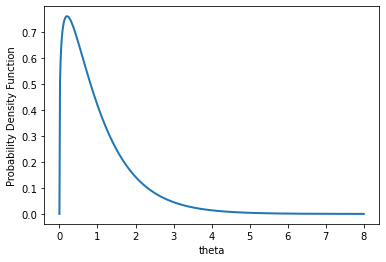

In [18]:
N=500
xs = np.linspace(0,8,N)
pdfs = stats.gamma.pdf(xs, 1.25, scale = 1 / 1.25) 

plt.plot(xs, pdfs, linewidth=2)

## add histogram of theta samples from the second model with 160 bins

plt.gca().set_xlabel("theta")
plt.gca().set_ylabel("Probability Density Function")
plt.show()

## Excercise 4 -  Selection of parameters using equation solving



In [19]:
model_tune = CmdStanModel(stan_file='code_6.stan')

F = 6
L = 8
y0 = 1

data={'y_guess':[y0],
        'theta':[(F+L)/2]}
tunes = model_tune.sample(data=data, fixed_param=True, iter_sampling=1, iter_warmup=0, chains = 1)
tunes.draws_pd()

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


,lp__,accept_stat__,sigma
0,0.0,0.0,2.71757


## Excercise 5 - different methods of defining models


In [20]:
model_samp_st = CmdStanModel(stan_file='code_7.stan')
model_log_target = CmdStanModel(stan_file='code_8.stan')
model_log_target_ind = CmdStanModel(stan_file='code_9.stan')
data = {'N': F}
seed = 13031998 #integer, your date of birth in the DDMMYYYY format without leading zero (or if you are GPRD weary, use any other date you wish)
result_1 = model_samp_st.sample(data=data,seed=seed)
result_2 = model_log_target.sample(data=data,seed=seed)
result_3 = model_log_target_ind.sample(data=data,seed=seed)



INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


INFO:cmdstanpy:CmdStan start procesing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


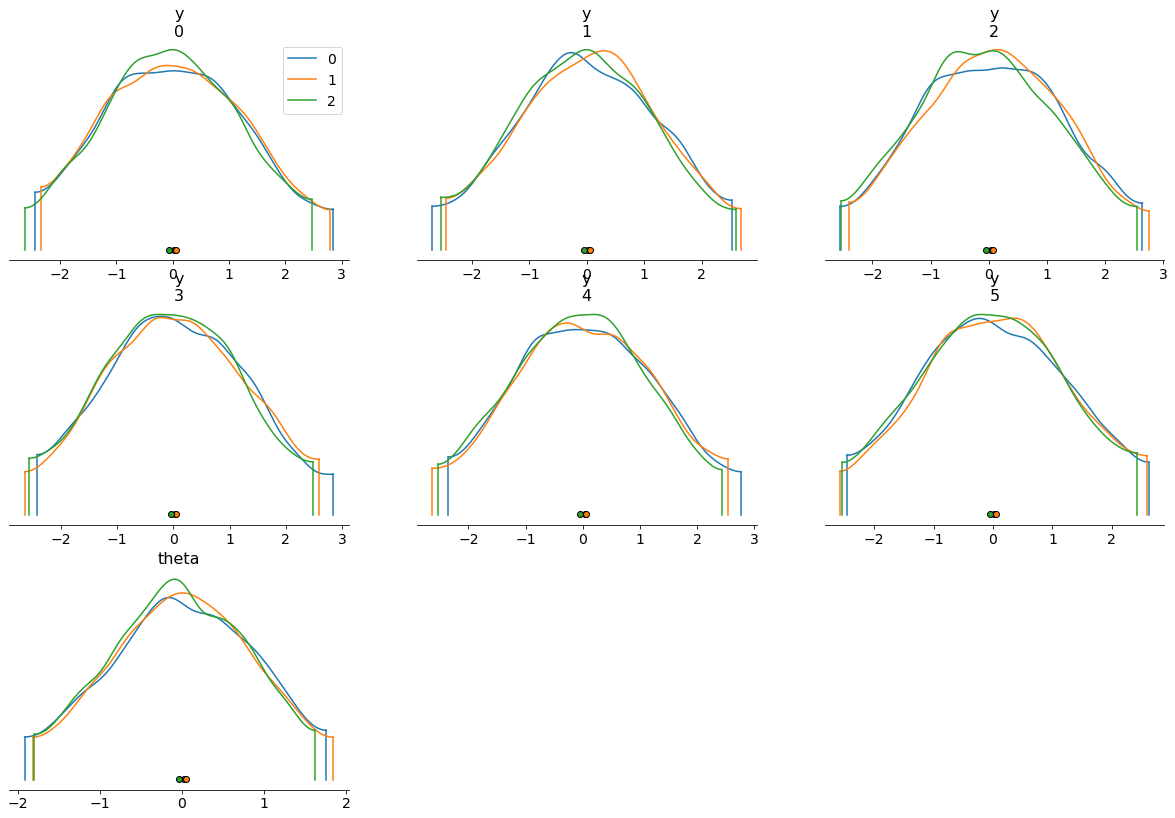

In [21]:
az.plot_density([result_1,result_2,result_3])
plt.show()

## Excercise 6 - generated quantities post sampling

In [22]:
model_gq = CmdStanModel(stan_file='code_10.stan')
# fill in with chosen result from previous excercise
mean_of_y = model_gq.generate_quantities(data=data,
                                        mcmc_sample = result_3)
# investigate the output and plot histogram of mean_y variableŌ

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:Chain [1] start processing
INFO:cmdstanpy:Chain [2] start processing
INFO:cmdstanpy:Chain [2] done processing
INFO:cmdstanpy:Chain [3] start processing
INFO:cmdstanpy:Chain [1] done processing
INFO:cmdstanpy:Chain [4] start processing
INFO:cmdstanpy:Chain [3] done processing
INFO:cmdstanpy:Chain [4] done processing


<BarContainer object of 30 artists>

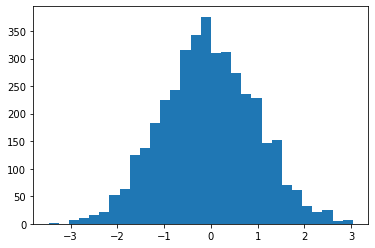

In [23]:
plt.hist(mean_of_y.draws_pd(),bins=30)[2]
